In [1]:
import matplotlib.pyplot as plt
import numpy as np

from exercises.part3.BiddingEnvironment import BiddingEnvironment
from exercises.part3.GPTS_Learner import GPTS_Learner
from exercises.part3.GTS_Learner import GTS_Learner

In [2]:
n_arms = 20
min_bid = 0.0
max_bid = 1.0
bids = np.linspace(min_bid, max_bid, n_arms)
sigma = 10

T = 50
n_experiments = 50
gts_rewards_per_experiment = []
gpts_rewards_per_experiment = []

In [3]:
for e in range(0, n_experiments):
    
    env = BiddingEnvironment(bids=bids, sigma=sigma)
    
    gts_learner = GTS_Learner(n_arms=n_arms)
    gpts_learner = GPTS_Learner(n_arms=n_arms, arms=bids)
    
    for t in range(0, T):

        # Gaussian Thomson Sampling
        pulled_arm = gts_learner.pull_arm()
        reward = env.round(pulled_arm)
        gts_learner.update(pulled_arm, reward)
        
        # GP Thomson Sampling
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        gpts_learner.update(pulled_arm, reward)
        
    gts_rewards_per_experiment.append(gts_learner.collected_rewards)
    gpts_rewards_per_experiment.append(gpts_learner.collected_rewards)
    

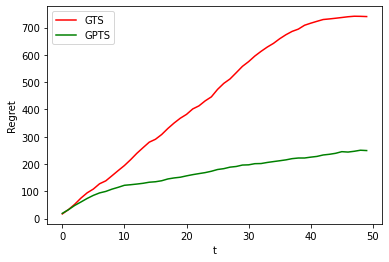

In [4]:
opt = np.max(env.mean)

plt.figure(0)
plt.ylabel('Regret')
plt.xlabel('t')

plt.plot(np.cumsum(np.mean(opt - gts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gpts_rewards_per_experiment, axis=0)), 'g')

plt.legend(['GTS', 'GPTS'])
